In [3]:
VAL_DIR   = "../data/raw/NEU-DET/validation"

IMG_SIZE  = (224, 224)
BATCH_SIZE = 32

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 360 files belonging to 6 classes.


In [4]:
import tensorflow as tf

model = tf.keras.models.load_model(
    "models/defect_detector_finetuned.keras"
)


In [5]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


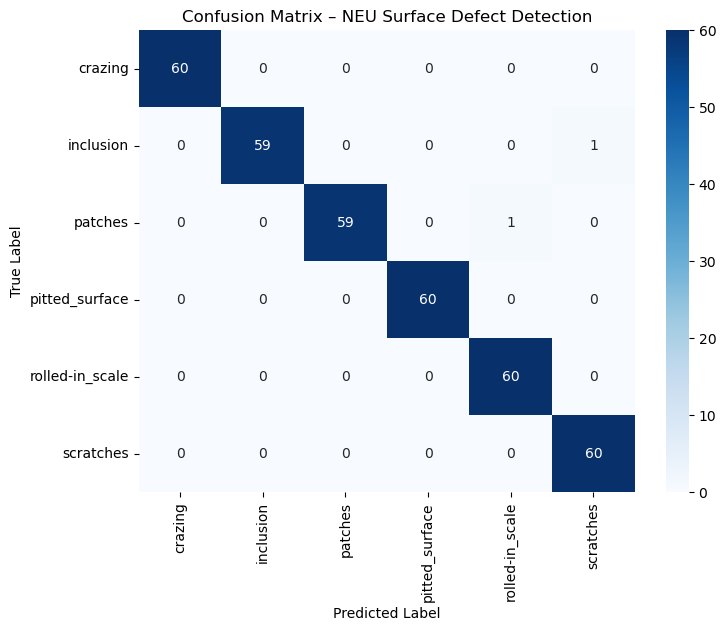

In [9]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=val_ds.class_names,
    yticklabels=val_ds.class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – NEU Surface Defect Detection")
plt.show()


In [12]:
print("Classification Report:\n", classification_report(y_true, y_pred,target_names=val_ds.class_names))

Classification Report:
                  precision    recall  f1-score   support

        crazing       1.00      1.00      1.00        60
      inclusion       1.00      0.98      0.99        60
        patches       1.00      0.98      0.99        60
 pitted_surface       1.00      1.00      1.00        60
rolled-in_scale       0.98      1.00      0.99        60
      scratches       0.98      1.00      0.99        60

       accuracy                           0.99       360
      macro avg       0.99      0.99      0.99       360
   weighted avg       0.99      0.99      0.99       360

